In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing the data into a pandas df
df = pd.read_csv('stars.csv')
df = df[[col for col in df.columns[:4]] + [col for col in df.columns[5:]] + [df.columns[4]]]
df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
222,9383,342940.000000,98.0000,-6.980,Blue,O,4
182,3419,0.000245,0.1260,17.560,Red,M,0
141,21020,0.001500,0.0112,11.520,Blue,B,2
123,3146,0.000150,0.0932,16.920,Red,M,0
231,38234,272830.000000,1356.0000,-9.290,Blue,O,5
199,3463,0.002700,0.6750,14.776,Red,M,1
30,39000,204000.000000,10.6000,-4.700,Blue,O,3
26,8570,0.000810,0.0097,14.200,Blue white,A,2
221,12749,332520.000000,76.0000,-7.020,Blue,O,4
161,11567,251000.000000,36.0000,-6.245,Blue,O,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star color              240 non-null    object 
 5   Spectral Class          240 non-null    object 
 6   Star type               240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [4]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


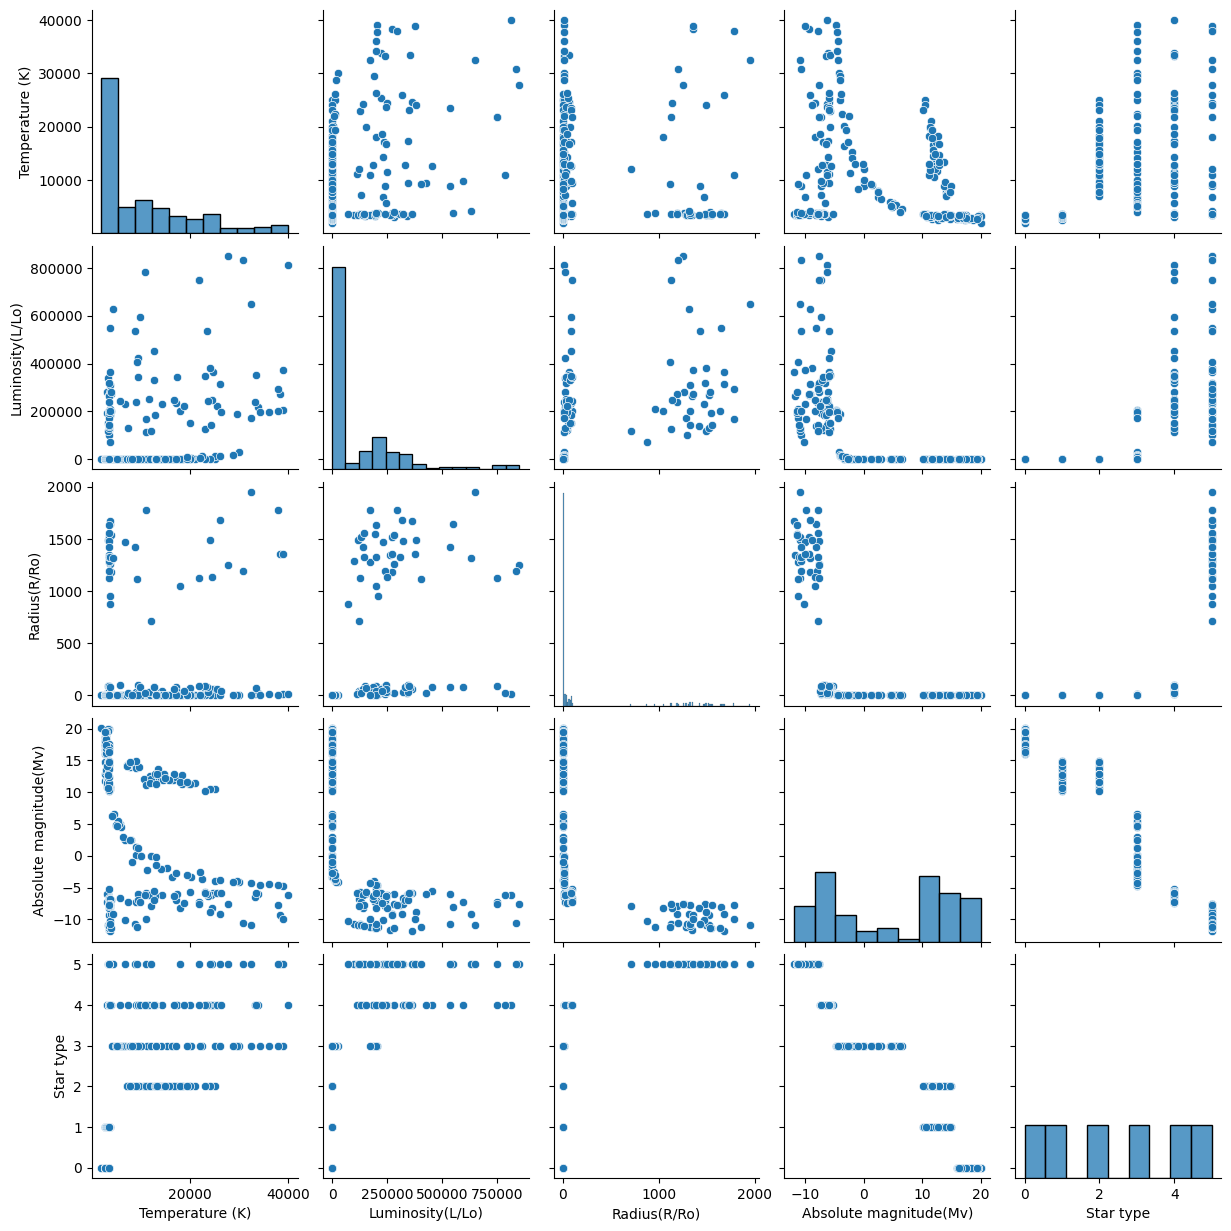

In [5]:
sns.pairplot(data=df)

C:\Users\Said\AppData\Local\Temp\ipykernel_41784\3722025756.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

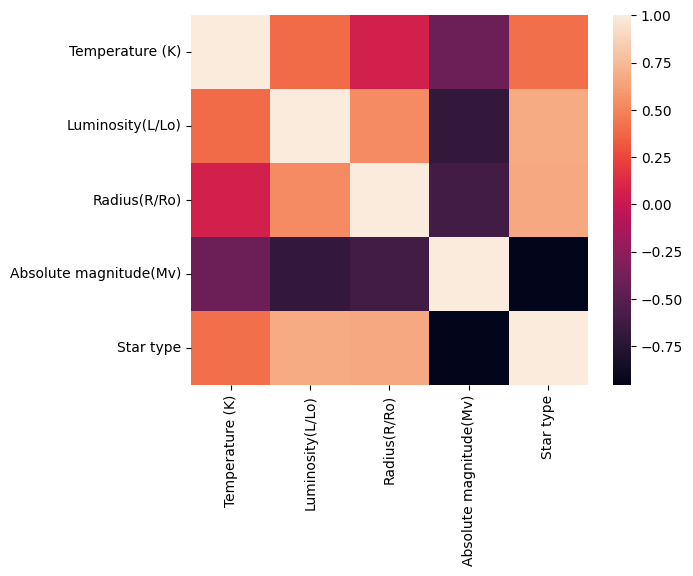

In [6]:
corr_matrix = df.corr()
sns.heatmap(data=corr_matrix)

<AxesSubplot: xlabel='Temperature (K)', ylabel='Absolute magnitude(Mv)'>

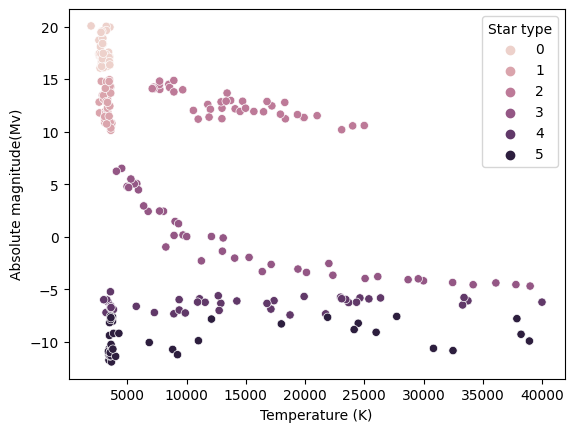

In [7]:
sns.scatterplot(data=df, x='Temperature (K)', y='Absolute magnitude(Mv)', hue='Star type')

<AxesSubplot: xlabel='Star type', ylabel='Absolute magnitude(Mv)'>

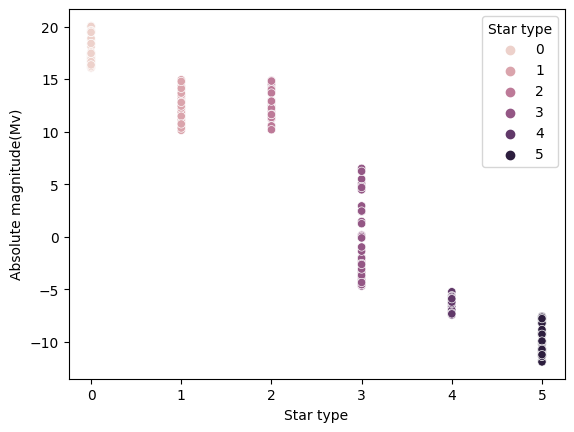

In [8]:
sns.scatterplot(data=df, x='Star type', y='Absolute magnitude(Mv)', hue='Star type')

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [10]:
# Data Splits
X = df.drop('Star type', axis=1)
y = df['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [11]:
# Define columns to be standard scaled and one-hot encoded
num_cols = df.columns[:4]  # First four columns
cat_cols = df.columns[4:6]  # Columns 4 and 5

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)])

X_transformed = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

c:\Users\Said\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:182: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [12]:
logreg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Fit the models
logreg.fit(X_transformed, y_train)
random_forest.fit(X_transformed, y_train)
knn.fit(X_transformed, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test_t)
y_pred_rf = random_forest.predict(X_test_t)
y_pred_knn = knn.predict(X_test_t)


In [13]:
# Evaluate the models
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      0.92      0.96        12
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

Accuracy: 0.9861111111111112


In [14]:
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        12

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Accuracy: 1.0


In [15]:
print("KNN:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       0.86      1.00      0.92        12
           4       1.00      0.83      0.91        12
           5       1.00      1.00      1.00        12

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.98      0.97      0.97        72

Accuracy: 0.9722222222222222


In [16]:
print("Logistic Regression:")
print(f1_score(y_test, y_pred_logreg, average='weighted'))
print("Random Forest:")
print(f1_score(y_test, y_pred_rf, average='weighted'))
print("KNN:")
print(f1_score(y_test, y_pred_knn, average='weighted'))

Logistic Regression:
0.9860869565217393
Random Forest:
1.0
KNN:
0.9720279720279721
